Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the Data

In [2]:
# Load Scala benchmark data
scala_idle_data = pd.read_csv('../data/20250307090345_thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_data = pd.read_csv('../data/20250307090356_thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_data = pd.read_csv('../data/20250307090440_thread_ring_benchmark_idle_power.csv')
erlang_bench_data = pd.read_csv('../data/20250307090451_thread_ring_benchmark_power_metrics.csv')

Preview the Data

In [3]:
print("Scala Idle Data Sample:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Data Sample:
(5, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 7 09:03:46 2025 +0100) (1008.53ms ela...,4.940,0.08130,0.914,7.43,0.95,57.48,61.16 C,Nominal
1,(Fri Mar 7 09:03:47 2025 +0100) (1007.39ms ela...,1.450,0.09430,0.847,3.80,0.62,36.92,60.69 C,Nominal
2,(Fri Mar 7 09:03:48 2025 +0100) (1008.51ms ela...,1.110,0.02410,0.609,3.09,0.31,22.80,60.25 C,Nominal
3,(Fri Mar 7 09:03:49 2025 +0100) (1007.41ms ela...,0.868,0.00000,0.661,2.86,0.46,25.01,60.11 C,Nominal
4,(Fri Mar 7 09:03:50 2025 +0100) (1005.97ms ela...,2.690,0.00182,0.610,4.64,0.40,25.62,59.95 C,Nominal


In [4]:
print("Scala Benchmark Data Sample:")
print(scala_bench_data.shape)
scala_bench_data.head()

Scala Benchmark Data Sample:
(14, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 7 09:03:56 2025 +0100) (106.69ms elap...,27.4,0.000,1.070,29.95,3.07,95.49,59.21 C,Nominal
1,(Fri Mar 7 09:03:56 2025 +0100) (104.72ms elap...,31.6,0.270,1.270,34.08,4.00,100.01,59.21 C,Nominal
2,(Fri Mar 7 09:03:56 2025 +0100) (104.14ms elap...,35.0,0.206,1.710,38.18,3.96,99.39,61.14 C,Nominal
3,(Fri Mar 7 09:03:56 2025 +0100) (104.22ms elap...,38.4,0.352,0.872,43.48,4.00,100.02,61.14 C,Nominal
4,(Fri Mar 7 09:03:57 2025 +0100) (105.45ms elap...,38.6,0.151,0.742,42.88,3.99,99.84,61.14 C,Nominal


In [5]:
print("Erlang Idle Data Sample:")
print(erlang_idle_data.shape)
erlang_idle_data.head()

Erlang Idle Data Sample:
(5, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 7 09:04:41 2025 +0100) (1009.19ms ela...,4.130,0.074300,0.856,6.46,0.79,46.32,61.79 C,Nominal
1,(Fri Mar 7 09:04:42 2025 +0100) (1005.27ms ela...,1.470,0.104000,0.881,3.89,0.76,44.36,61.67 C,Nominal
2,(Fri Mar 7 09:04:43 2025 +0100) (1008.57ms ela...,2.050,0.025100,0.709,4.18,0.63,38.25,61.52 C,Nominal
3,(Fri Mar 7 09:04:44 2025 +0100) (1008.07ms ela...,0.732,0.000303,0.588,2.73,0.38,25.45,61.38 C,Nominal
4,(Fri Mar 7 09:04:45 2025 +0100) (1008.89ms ela...,3.970,0.000061,0.662,6.01,0.62,37.92,61.23 C,Nominal


In [6]:
print("Erlang Benchmark Data Sample:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Data Sample:
(3, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 7 09:04:51 2025 +0100) (108.55ms elap...,14.8,0.327,1.07,17.57,1.53,94.58,60.80 C,Nominal
1,(Fri Mar 7 09:04:52 2025 +0100) (105.98ms elap...,17.6,0.556,1.52,20.81,1.91,95.04,60.80 C,Nominal
2,(Fri Mar 7 09:04:52 2025 +0100) (104.74ms elap...,21.1,0.505,1.68,24.82,2.38,99.39,60.80 C,Nominal


Cleaning the Data


In [7]:
def clean_data(df):
    df_copy = df.copy() 

    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    return df_copy

In [8]:
scala_idle_data_clean = clean_data(scala_idle_data)
scala_bench_data_clean = clean_data(scala_bench_data)
erlang_idle_data_clean = clean_data(erlang_idle_data)
erlang_bench_data_clean = clean_data(erlang_bench_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Cleaned Data Sample:")
print(scala_idle_data_clean.shape)
scala_idle_data_clean.head()


Scala Idle Cleaned Data Sample:
(5, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-07 09:03:46,4.940,0.08130,0.914,7.43,0.95,57.48,61.16,Nominal,1008.53
1,2025-03-07 09:03:47,1.450,0.09430,0.847,3.80,0.62,36.92,60.69,Nominal,1007.39
2,2025-03-07 09:03:48,1.110,0.02410,0.609,3.09,0.31,22.80,60.25,Nominal,1008.51
3,2025-03-07 09:03:49,0.868,0.00000,0.661,2.86,0.46,25.01,60.11,Nominal,1007.41
4,2025-03-07 09:03:50,2.690,0.00182,0.610,4.64,0.40,25.62,59.95,Nominal,1005.97


In [10]:
print("Scala Benchmark Cleaned Data Sample:")
print(scala_bench_data_clean.shape)
scala_bench_data_clean.head()


Scala Benchmark Cleaned Data Sample:
(14, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-07 09:03:56,27.4,0.000,1.070,29.95,3.07,95.49,59.21,Nominal,106.69
1,2025-03-07 09:03:56,31.6,0.270,1.270,34.08,4.00,100.01,59.21,Nominal,104.72
2,2025-03-07 09:03:56,35.0,0.206,1.710,38.18,3.96,99.39,61.14,Nominal,104.14
3,2025-03-07 09:03:56,38.4,0.352,0.872,43.48,4.00,100.02,61.14,Nominal,104.22
4,2025-03-07 09:03:57,38.6,0.151,0.742,42.88,3.99,99.84,61.14,Nominal,105.45


In [11]:
print("Erlang Idle Cleaned Data Sample:")
print(erlang_idle_data_clean.shape)
erlang_idle_data_clean.head()


Erlang Idle Cleaned Data Sample:
(5, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-07 09:04:41,4.130,0.074300,0.856,6.46,0.79,46.32,61.79,Nominal,1009.19
1,2025-03-07 09:04:42,1.470,0.104000,0.881,3.89,0.76,44.36,61.67,Nominal,1005.27
2,2025-03-07 09:04:43,2.050,0.025100,0.709,4.18,0.63,38.25,61.52,Nominal,1008.57
3,2025-03-07 09:04:44,0.732,0.000303,0.588,2.73,0.38,25.45,61.38,Nominal,1008.07
4,2025-03-07 09:04:45,3.970,0.000061,0.662,6.01,0.62,37.92,61.23,Nominal,1008.89


In [12]:
print("Erlang Benchmark Cleaned Data Sample:")
print(erlang_bench_data_clean.shape)
erlang_bench_data_clean.head()

Erlang Benchmark Cleaned Data Sample:
(3, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-07 09:04:51,14.8,0.327,1.07,17.57,1.53,94.58,60.8,Nominal,108.55
1,2025-03-07 09:04:52,17.6,0.556,1.52,20.81,1.91,95.04,60.8,Nominal,105.98
2,2025-03-07 09:04:52,21.1,0.505,1.68,24.82,2.38,99.39,60.8,Nominal,104.74


Handling Outliers


In [13]:
def remove_outliers(df, columns):
    """
    Removes outliers from the specified columns using the IQR method.
    """
    df_clean = df.copy()
    
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

In [14]:
# Columns of interest for outlier removal
columns_of_interest = [
    "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
    "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
]

scala_idle_data_clean = remove_outliers(scala_idle_data_clean, columns_of_interest)
scala_bench_data_clean = remove_outliers(scala_bench_data_clean, columns_of_interest)
erlang_idle_data_clean = remove_outliers(erlang_idle_data_clean, columns_of_interest)
erlang_bench_data_clean = remove_outliers(erlang_bench_data_clean, columns_of_interest)

In [15]:
print("Scala Idle Cleaned Data Shape: ",scala_idle_data_clean.shape)
print("Scala Benchmark Cleaned Data Shape: ", scala_bench_data_clean.shape)
print("Erlang Idle Cleaned Data Shape: ", scala_idle_data_clean.shape)
print("Erlang Benchmark Cleaned Data Shape: ", scala_bench_data_clean.shape)

Scala Idle Cleaned Data Shape:  (4, 10)
Scala Benchmark Cleaned Data Shape:  (8, 10)
Erlang Idle Cleaned Data Shape:  (4, 10)
Erlang Benchmark Cleaned Data Shape:  (8, 10)


Visualization

In [17]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates separate figures for each metric, plotting idle (left) and benchmark (right).
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]
    
    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
        
        # Idle (Left Side)
        axes[0].plot(idle_df["Timestamp"], idle_df[column], color='blue', label="Idle")
        axes[0].set_title(f"Idle - {column}")
        axes[0].set_xlabel("Time")
        axes[0].set_ylabel(column)
        axes[0].legend()
        axes[0].grid(True)
        axes[0].tick_params(axis='x', rotation=45)

        # Benchmark (Right Side)
        axes[1].plot(bench_df["Timestamp"], bench_df[column], color='red', label="Benchmark")
        axes[1].set_title(f"Benchmark - {column}")
        axes[1].set_xlabel("Time")
        axes[1].set_ylabel(column)
        axes[1].legend()
        axes[1].grid(True)
        axes[1].tick_params(axis='x', rotation=45)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
        plt.show()


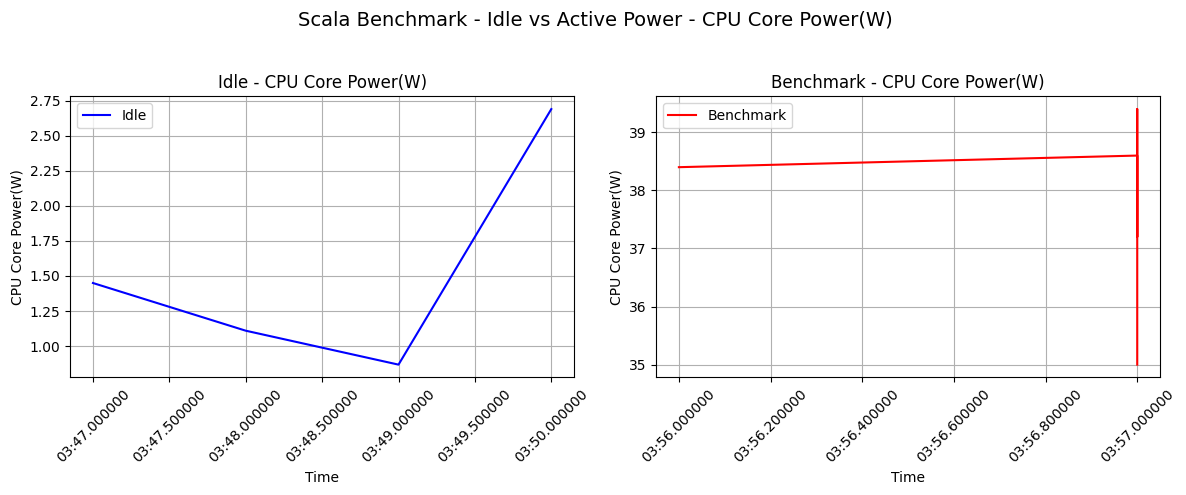

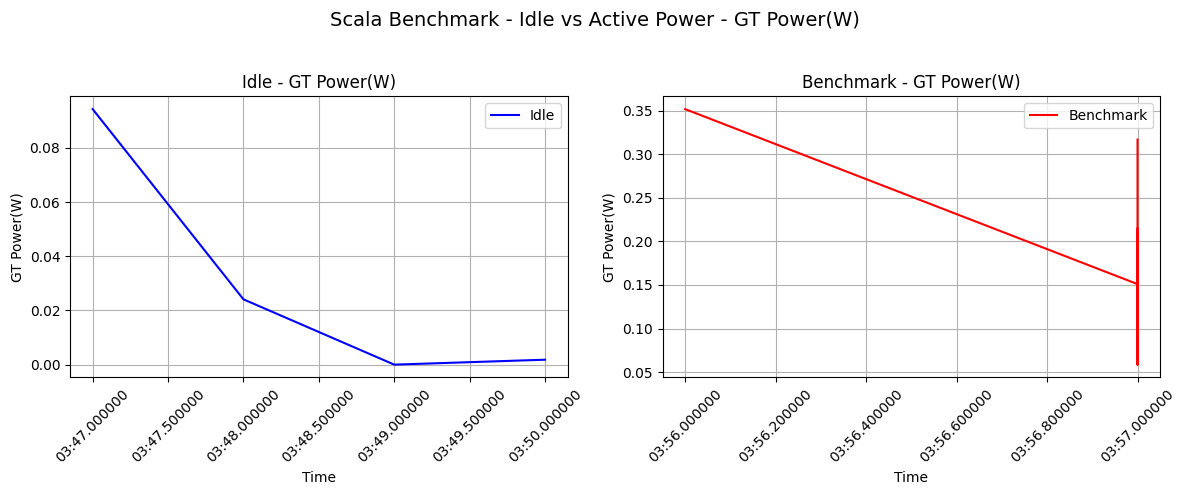

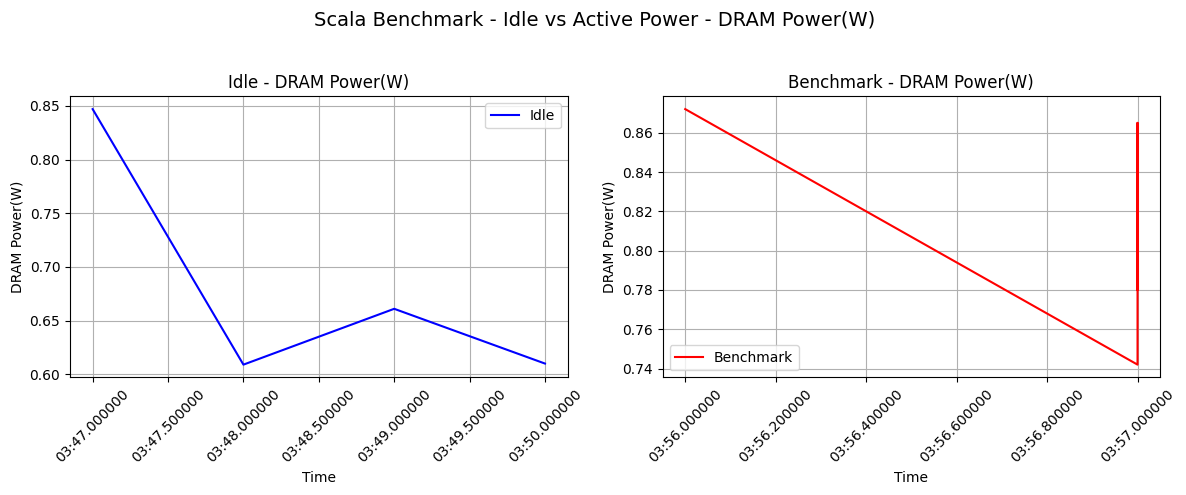

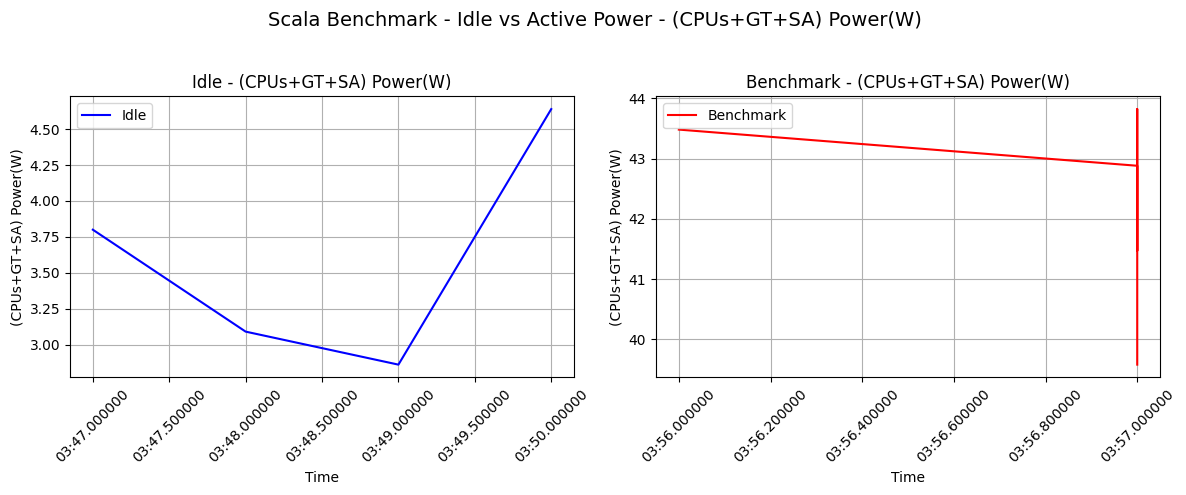

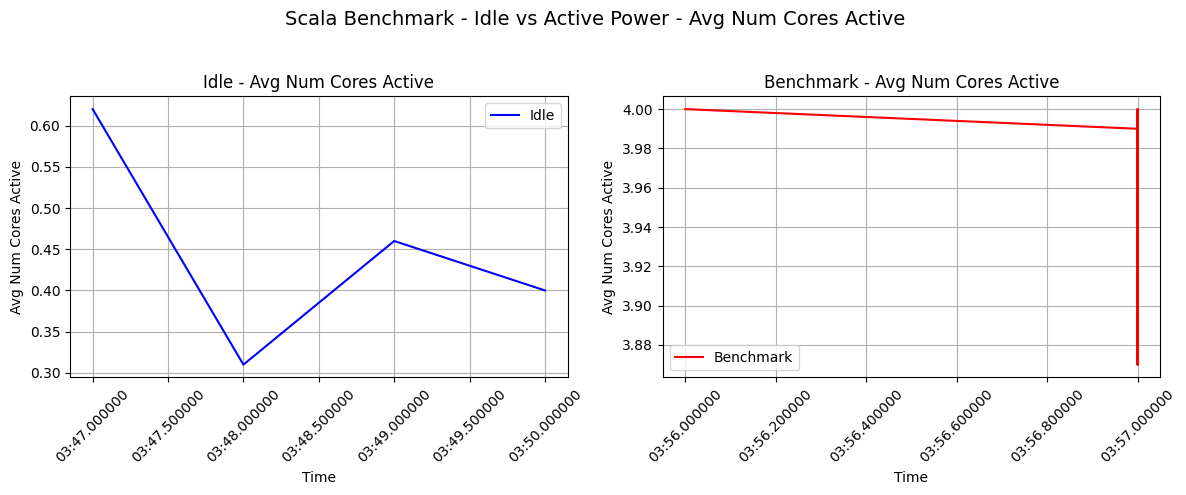

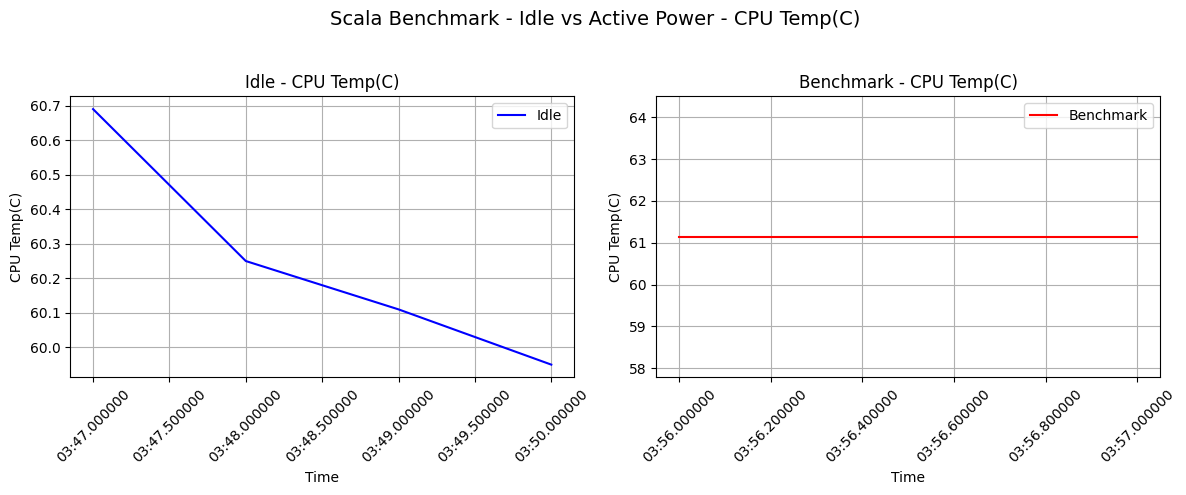

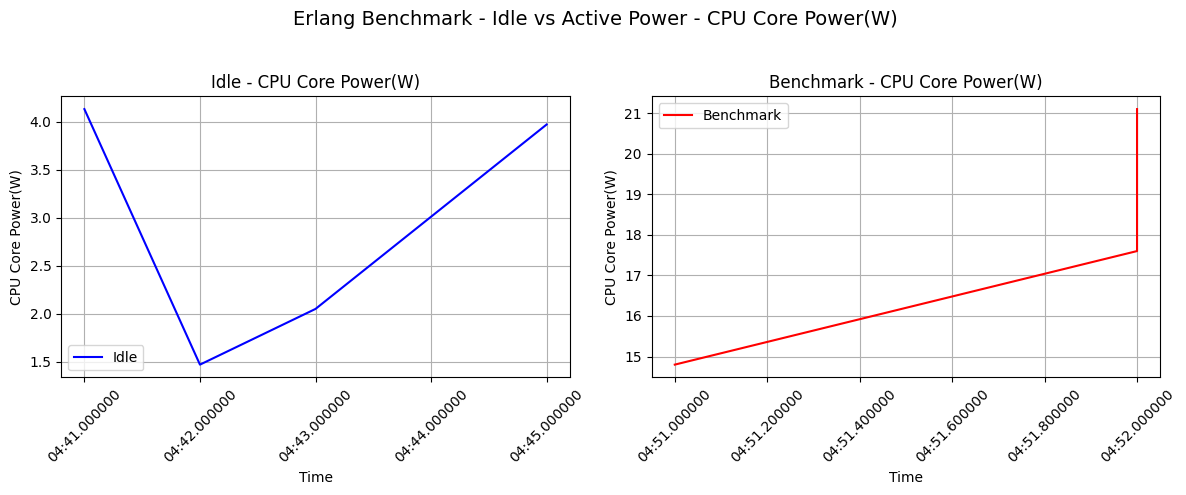

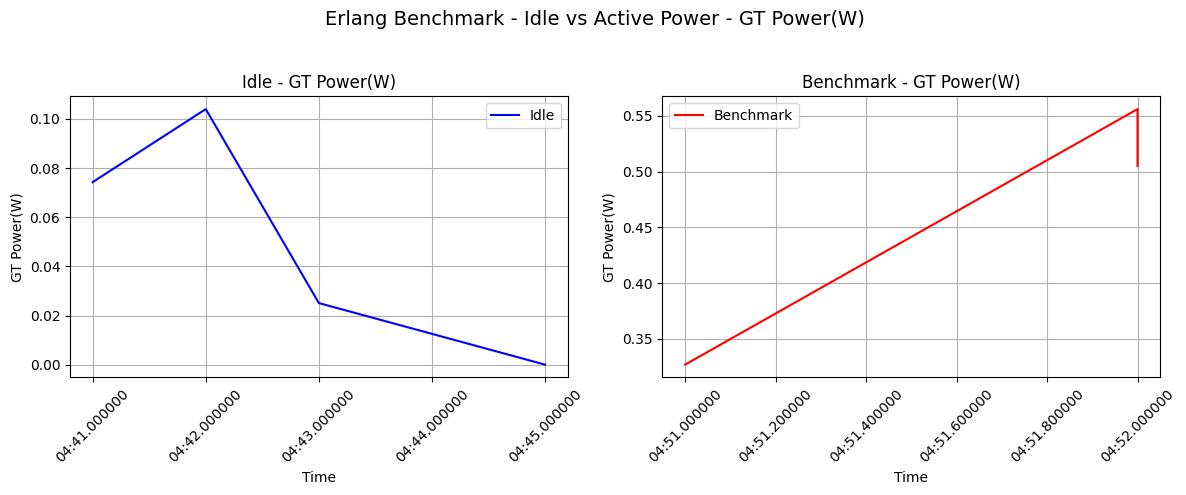

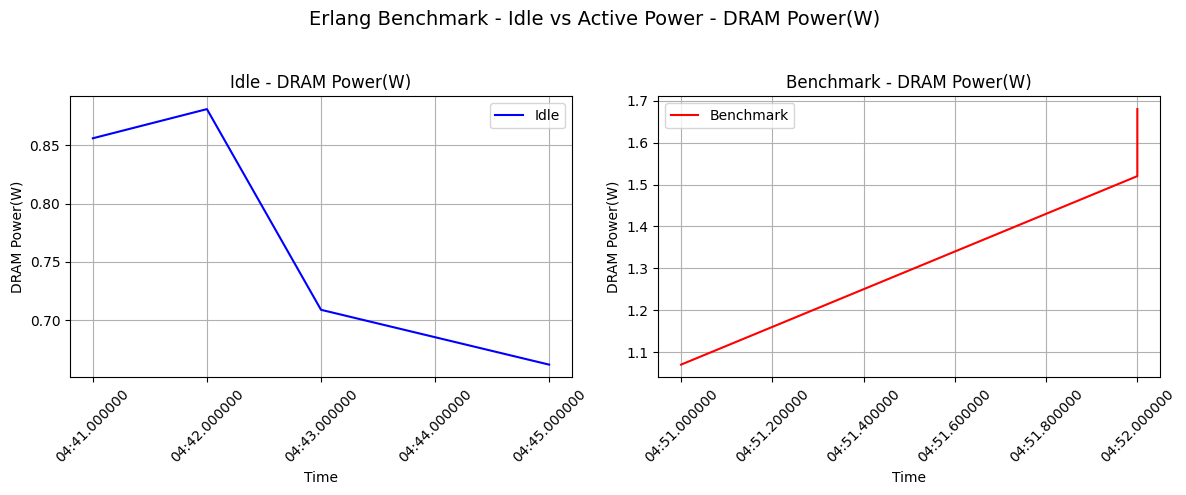

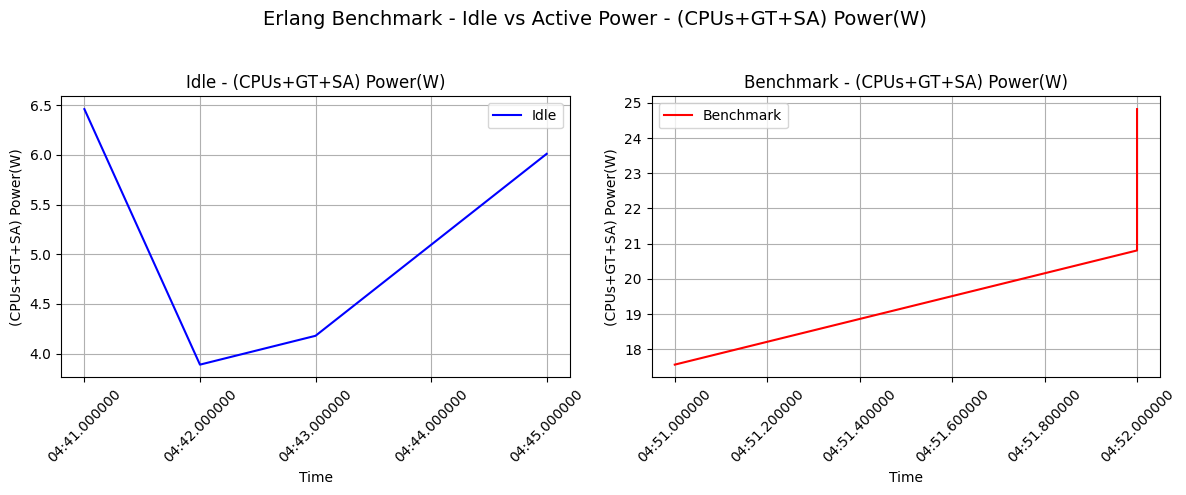

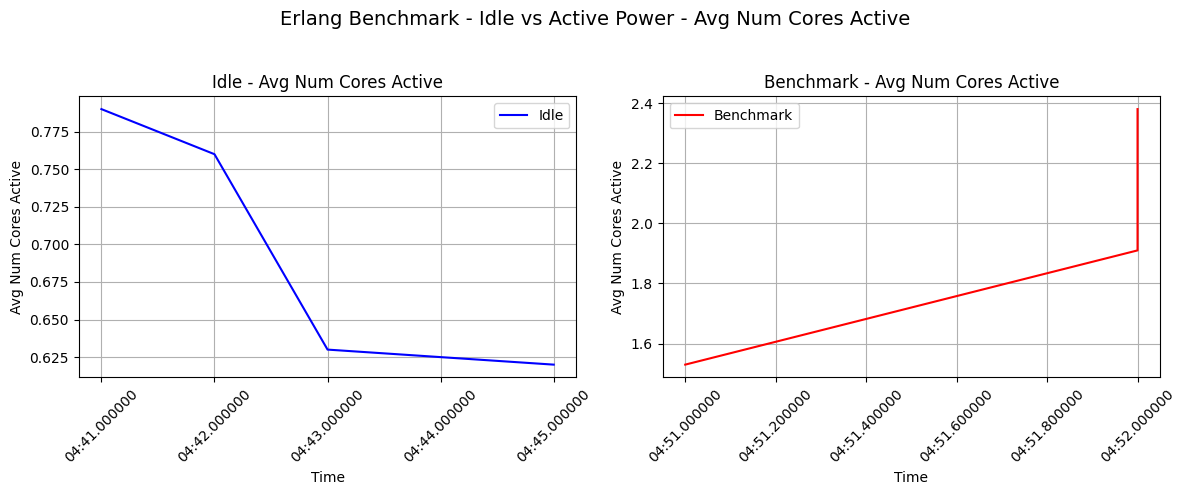

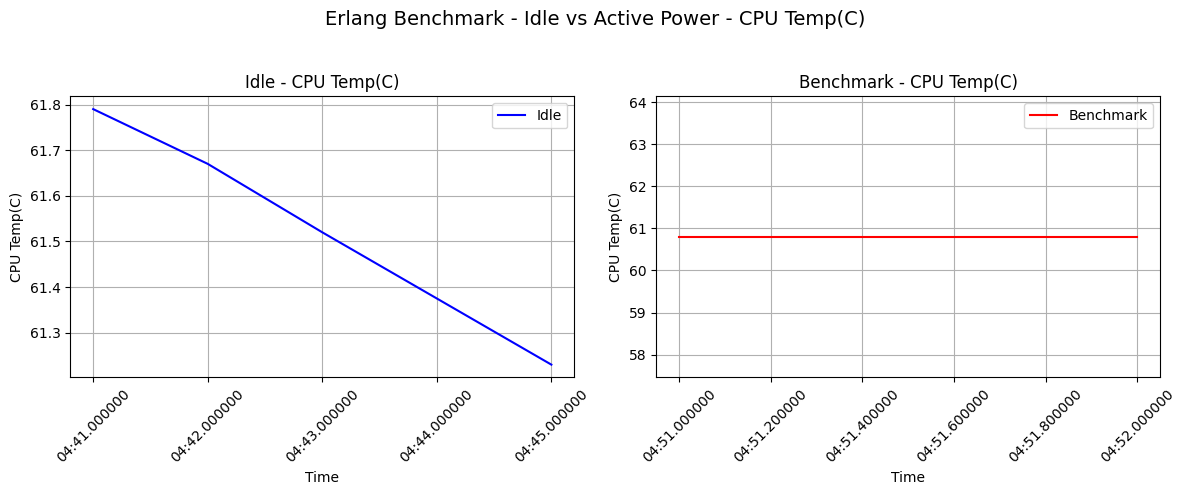

In [18]:
plot_graphs(scala_idle_data_clean, scala_bench_data_clean, "Scala Benchmark - Idle vs Active Power")
plot_graphs(erlang_idle_data_clean, erlang_bench_data_clean, "Erlang Benchmark - Idle vs Active Power")

Compute Average Power Consumption

In [43]:
power_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)"]

In [44]:
def calculate_average_power(df, power_columns):
    """
    Calculates the average power consumption for the specified columns.
    """
    avg_power = df[power_columns].mean()
    return avg_power

scala_idle_avg_power = calculate_average_power(scala_idle_data_clean, power_columns)
erlang_idle_avg_power = calculate_average_power(erlang_idle_data_clean, power_columns)

scala_bench_avg_power = calculate_average_power(scala_bench_data_clean, power_columns)
erlang_bench_avg_power = calculate_average_power(erlang_bench_data_clean, power_columns)

scala_net_avg_power = scala_bench_avg_power - scala_idle_avg_power
erlang_net_avg_power = erlang_bench_avg_power - erlang_idle_avg_power

print("Net Average Power Consumption (Watts) Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avg_power, "\n")
print("Erlang Benchmark:")
print(erlang_net_avg_power)

Net Average Power Consumption (Watts) Comparison:

Scala Benchmark:
CPU Core Power(W)        36.145500
GT Power(W)               0.187758
DRAM Power(W)             0.133125
(CPUs+GT+SA) Power(W)    38.588750
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        14.928333
GT Power(W)               0.411802
DRAM Power(W)             0.646333
(CPUs+GT+SA) Power(W)    15.931667
dtype: float64


Compute Energy Consumption

In [15]:
def calculate_net_energy(bench_df, idle_df, time_column, power_columns):
    """
    Calculates the net energy consumption by subtracting idle power from benchmark power.
    """
    avg_idle_power = idle_df[power_columns].mean()  # Compute average idle power per column
    time_elapsed = bench_df[time_column].diff().fillna(0) / 1000  # Convert ms to seconds

    net_energy = {}
    for column in power_columns:
        energy = ((bench_df[column] - avg_idle_power[column]) * time_elapsed).sum()
        net_energy[column] = energy

    return net_energy

In [ ]:
scala_energy = calculate_net_energy(scala_bench_data_clean, scala_idle_data_clean, "Time Elapsed (ms)", power_columns)
erlang_energy = calculate_net_energy(erlang_bench_data_clean, erlang_idle_data_clean, "Time Elapsed (ms)", power_columns)

# Compute energy difference
energy_difference = {key: scala_energy[key] - erlang_energy[key] for key in scala_energy}

In [17]:
print("\nNet Energy Consumption (Joules) Comparison:")
print("Scala Benchmark:", scala_energy)
print("Erlang Benchmark:", erlang_energy)
print("Energy Difference (Scala - Erlang):", energy_difference)


Net Energy Consumption (Joules) Comparison:
Scala Benchmark: {'CPU Core Power(W)': np.float64(-0.016213365000000014), 'GT Power(W)': np.float64(-0.00024005085000000138), 'DRAM Power(W)': np.float64(-1.6012500000001182e-05), '(CPUs+GT+SA) Power(W)': np.float64(-0.017979125000000006)}
Erlang Benchmark: {'CPU Core Power(W)': np.float64(-0.060327950000000075), 'GT Power(W)': np.float64(-0.001861323873750001), 'DRAM Power(W)': np.float64(-0.003029230000000003), '(CPUs+GT+SA) Power(W)': np.float64(-0.06469415000000008)}
Energy Difference (Scala - Erlang): {'CPU Core Power(W)': np.float64(0.04411458500000006), 'GT Power(W)': np.float64(0.0016212730237499997), 'DRAM Power(W)': np.float64(0.003013217500000002), '(CPUs+GT+SA) Power(W)': np.float64(0.04671502500000007)}
